In [69]:
#standard
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
#custom
from titeseq_functions import *
from titeseq_modeling import *
from protein_onehotencoder import *
#models and metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm

In [31]:
fit_data_save_location = '/scratch/gthurber_root/gthurber0/marcase/titeseq/fit_data/'
binary_data = pd.read_csv(fit_data_save_location+'binary_bloom2022.csv')
continuous_data = pd.read_csv(fit_data_save_location+'continuous_bloom2022.csv')
binary_data = binary_data.set_index('sequence')
continuous_data = continuous_data.set_index('sequence')
binary_data.index = binary_data.index.str[1:]
continuous_data.index = continuous_data.index.str[1:]
binary_data

,ratios,mean,count,std,min,max
sequence,,,,,,
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYPPYRVVVLSFELLHAPATVCGPKKST,"[251.5190705499922, 65.90442867465799, 55.8477...",29.582242,35,42.984073,0.051049,251.519071
NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYPPYRVVVLSFELLHAPATVCGPKKST,[144.67323846938865],144.673238,1,0.000000,144.673238,144.673238
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSDVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTRGVGYQPYRVVVLSFELLHAPATVCGPKKST,[159.06909353232712],159.069094,1,0.000000,159.069094,159.069094
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTFKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPLTVCGPKKST,[23.686796982990945],23.686797,1,0.000000,23.686797,23.686797
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNSVGYQPYRVVVLSFELLHAPATVCGPKKST,"[163.1530240466359, 38.235799440215985, 18.888...",13.754095,42,25.799569,0.153147,163.153024
...,...,...,...,...,...,...
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVVAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFGLLHAPATVCGPKKST,[1.225179154292635],1.225179,1,0.000000,1.225179,1.225179
NITNLCPFGEVFNATRFASVYAWTRKRISNCVAYYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,[1.4804248114369338],1.480425,1,0.000000,1.480425,1.480425
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSAGFSTFKCYGVSPTKLIDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,[1.8377687314389526],1.837769,1,0.000000,1.837769,1.837769


In [32]:
continuous_data

,Kds,mean,count,std
sequence,,,,
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGNIADYNYKLPDDFTGCKIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKST,"[3.2927081345449904e-08, 7.862162152770024e-07...",1.601152e-07,15,3.784540e-07
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQGTYGVGYQPYRVVVLSFELLHAPATVCGPKKST,"[1.072726884839601e-08, 1.0553483846502093e-08...",2.670977e-08,33,4.654992e-08
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGQEVRQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKST,"[2.8125311010685614e-09, 1.18378918408883e-09,...",2.638456e-09,25,2.190593e-09
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQMAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKST,"[8.101692111850255e-09, 2.1214838792587013e-09...",1.361575e-08,41,2.676073e-08
NITNLCPFGEVFNATRFASVYAENRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGNIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKST,"[8.285952069807347e-06, 5.510779964128036e-06,...",1.976634e-06,11,3.233718e-06
...,...,...,...,...
NITNLCPFGEVFNATRFASVYAWNRKRNSNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYTDSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,[5.396585178005522e-08],5.396585e-08,1,0.000000e+00
NITNLCPFGEVFNATRFASVYAWNRIRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQPGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,[8.593898456303798e-09],8.593898e-09,1,0.000000e+00
NITLLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSQLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,[6.039575630247964e-10],6.039576e-10,1,0.000000e+00


In [48]:
len(np.intersect1d(binary_data.index.values,continuous_data.index.values))

13641

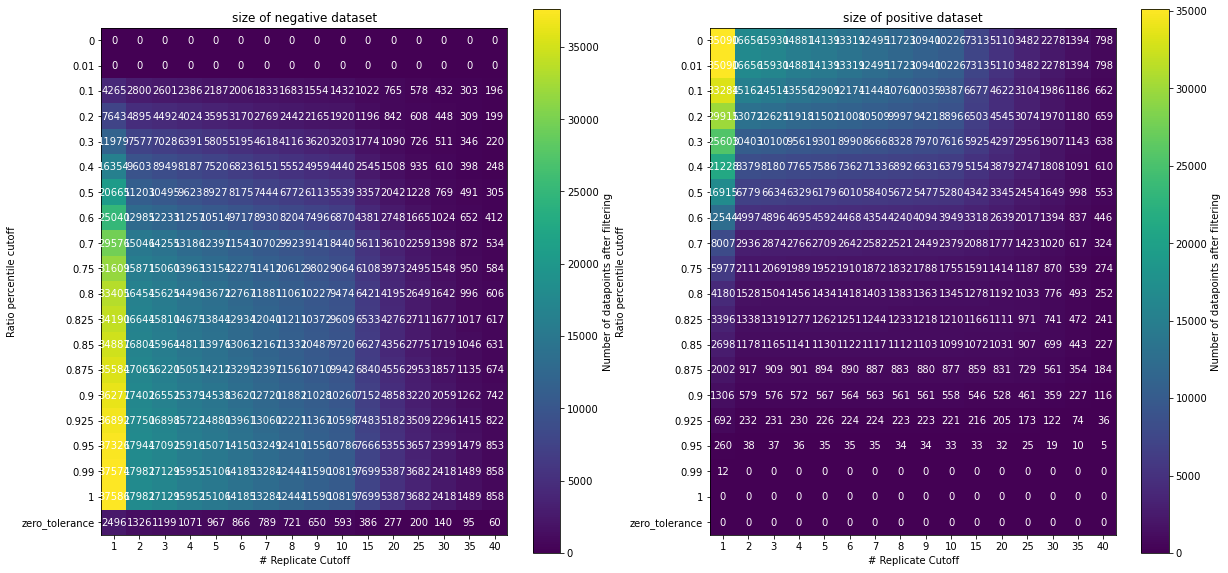

In [22]:
#get datasize based on various cutoffs
percentile_cutoffs = [0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.99,1]
replicate_cutoffs = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]
zero_tolerance = True
plotDatasetCutoff(input_data=binary_data,data_type='duplicated',replicate_cutoffs=replicate_cutoffs,percentile_cutoffs=percentile_cutoffs,zero_tolerance=True)

In [33]:
positive_labels,negative_labels = generateBinaryDataset(input_data=binary_data,data_type='duplicated',replicate_cutoff=(1,1),percentile_cutoff=(0.8,0.2),zero_tolerance=True)

/home/marcase/titeseq/titeseq_functions.py:548: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_labels['label'] = 1
/home/marcase/titeseq/titeseq_functions.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_labels['label'] = 0


In [45]:
positive_labels

,mean,label
sequence,,
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYPPYRVVVLSFELLHAPATVCGPKKST,29.582242,1
NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYPPYRVVVLSFELLHAPATVCGPKKST,144.673238,1
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSDVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTRGVGYQPYRVVVLSFELLHAPATVCGPKKST,159.069094,1
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTFKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPLTVCGPKKST,23.686797,1
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNSVGYQPYRVVVLSFELLHAPATVCGPKKST,13.754095,1
...,...,...
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCHTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNFNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,8.423107,1
NITNGCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYTDSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGCNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,8.474156,1
NITNLCPFGEVFNATDFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDIMTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,8.525205,1


In [35]:
negative_labels

,mean,label
sequence,,
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFWCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLASYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
NITNLCPFGEVFNATRFASVYAWNRTRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDHVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRFRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVTQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLFSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKSNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISNEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
...,...,...
NITNLCPFGEVFNATRFASVYAWNRKRISNCVAEYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLVSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
NITNLCPFGEVFNATTFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNILYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.0,0
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPVTVCGPKKSI,0.0,0


In [36]:
print(f'number of shared sequences between positive and datasets is {len(positive_labels.index.intersection(negative_labels.index))}') #should be zero length
binary_data = pd.concat([positive_labels,negative_labels],join='outer',axis=0)
binary_data

number of shared sequences between positive and datasets is 0


,mean,label
sequence,,
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYPPYRVVVLSFELLHAPATVCGPKKST,29.582242,1
NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYPPYRVVVLSFELLHAPATVCGPKKST,144.673238,1
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSDVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTRGVGYQPYRVVVLSFELLHAPATVCGPKKST,159.069094,1
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTFKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPLTVCGPKKST,23.686797,1
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNSVGYQPYRVVVLSFELLHAPATVCGPKKST,13.754095,1
...,...,...
NITNLCPFGEVFNATRFASVYAWNRKRISNCVAEYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLVSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.000000,0
NITNLCPFGEVFNATTFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNILYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST,0.000000,0
NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPVTVCGPKKSI,0.000000,0


In [37]:
#minimum number of mutations in a site
threshold = 1
#minimum number of observed mutations needed to include
min_count = 1
varying_sites = ProteinOneHotEncoder.get_varying_sites(binary_data.index.values,threshold=threshold,min_count=min_count)
print(f'varying sites are {varying_sites}')

varying sites are [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200]


In [55]:
#intersect continuous and binary datasets - investigate how filtering led to such a lack of overlap?
common_indices = binary_data.index.intersection(continuous_data.index)
len(common_indices)

13641

In [57]:
binary_data = binary_data.loc[common_indices]
continuous_data = continuous_data.loc[common_indices]

In [58]:
#one hot encode automatically using the custom ProteinOneHotEncoder class
enc = ProteinOneHotEncoder()
X_encoded = enc.fit_transform(binary_data.index.values)
X_encoded

<13641x4028 sparse matrix of type '<class 'numpy.float64'>'
	with 2741841 stored elements in Compressed Sparse Row format>

In [59]:
y_binary = binary_data['label'].values
y_binary

array([1, 1, 1, ..., 0, 0, 0])

In [61]:
X_encoded = enc.fit_transform(binary_data.index.values)
y_continuous = continuous_data['mean'].values
y_continuous

array([8.40236032e-07, 5.94301951e-07, 3.21527926e-09, ...,
       8.48237664e-10, 1.99833520e-10, 4.29031686e-10])

In [64]:
#scale output
scaler = StandardScaler()
y_continuous = scaler.fit_transform(y_continuous.reshape(-1, 1))

In [65]:
print(f'Shape of X is {X_encoded.shape}, shape of continuous y is {y_continuous.shape}, shape of binary y is {y_binary.shape}')

Shape of X is (13641, 4028), shape of continuous y is (13641, 1), shape of binary y is (13641,)


Text(0.5, 0, 'continuous target value')

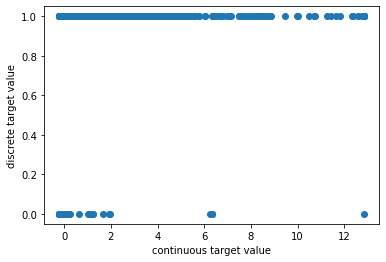

In [66]:
plt.scatter(y_continuous,y_binary) #box and whisker? or shift the data points with some noise to see the density
plt.ylabel('discrete target value')
plt.xlabel('continuous target value')

In [ ]:
#test regression models potential of modeling classification tasks and regression tasks
tester = ModelTester(X_encoded, y_binary,y_continuous)
models = [linear_model.LinearRegression(),linear_model.Ridge(alpha=0.5),linear_model.Lasso(alpha=0.01),svm.SVR(),KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
tester.test_models(models)

Binary mode : LinearRegression: 0.78
Continuous mode : LinearRegression: -0.42
Binary mode : Ridge: 0.81
Continuous mode : Ridge: -0.24
Binary mode : Lasso: 0.75
Continuous mode : Lasso: 0.02
Binary mode : SVR: 0.78


/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Continuous mode : SVR: -0.00
Binary mode : KNeighborsRegressor: 0.71
Continuous mode : KNeighborsRegressor: -0.08
Binary mode : DecisionTreeRegressor: 0.74
Continuous mode : DecisionTreeRegressor: -0.58
